<a href="https://colab.research.google.com/github/zoya-ivanova/-Data-Science/blob/main/%D0%B3%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D0%B8%D1%8F_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подготовим данные о качестве сна Sleep_health_and_lifestyle_dataset.csv к моделированию, сгенерируем новые признаки, применим методы отбора признаков для улучшения качества предсказательной модели и подберем оптимальные гиперпараметры для модели регрессии.

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Считываем данные
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


DataFrame содержит 374 записи, индексированные от 0 до 373.
- Всего в DataFrame 13 столбцов с различными типами данных:  
  - ` Person ID:` целочисленный тип (int64), каждое значение в столбце непустое (non-null), представляет собой уникальный идентификатор человека.  
  - `Gender:` тип данных object, возможно, содержит строки, указывающие на пол. Все значения непустые.  
  - `Age:` целочисленный тип (int64), содержит возраст участников, все значения непустые.
  - `Occupation:` тип данных object, предположительно содержит информацию о профессии участников, все значения непустые.
  - `Sleep Duration:` тип данных с плавающей запятой (float64), отражает продолжительность сна, все значения непустые.
  - `Quality of Sleep:` целочисленный тип (int64), представляет качество сна, возможно, в некоторой шкале оценок, все значения непустые.
  - `Physical Activity Level:` целочисленный тип (int64), описывает уровень физической активности, все значения непустые.
  - `Stress Level:` целочисленный тип (int64), показывает уровень стресса, все значения непустые.
  - `BMI Category:` тип данных object, возможно, содержит категории индекса массы тела, все значения непустые.
  - `Blood Pressure:` тип данных object, содержит данные о давлении крови, все значения непустые.
  - `Heart Rate:` целочисленный тип (int64), отражает показатели сердечного ритма, все значения непустые.
  - `Daily Steps:` целочисленный тип (int64), показывает количество шагов в день, все значения непустые.
  - `Sleep Disorder:` тип данных object, содержит информацию о наличии расстройств сна, только 155 значений непусты, что означает, что у остальных участников либо нет расстройства сна, либо данная информация не была предоставлена.

In [6]:
# Обработка пропущенных значений
df['Sleep Disorder'].isna().sum()

219

In [7]:
df['Sleep Disorder'].fillna('No Disorder', inplace=True)

In [8]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
No Disorder,219
Sleep Apnea,78
Insomnia,77


In [9]:
# Проверим пропущенные значения (NaN)
df.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [10]:
# Анализ статистических характеристик
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


1. Возраст участников (Age):
   - Среднее значение (mean): 42.184492 лет
   - Медиана (50%): 43.000000 лет
   - Стандартное отклонение (std): 8.673133 лет
   - Минимальное значение (min): 27.000000 лет
   - Максимальное значение (max): 59.000000 лет

2. Среднее количество часов сна в ночь (Sleep Duration):
   - Среднее значение (mean): 7.132086 часов в ночь
   - Медиана (50%): 7.000000 часов в ночь
   - Стандартное отклонение (std): 0.795657 часа
   - Минимальное значение (min): 5.800000 часов в ночь
   - Максимальное значение (max): 8.500000 часов в ночь

3. Общая продолжительность физической активности в неделю (Physical Activity Level):
   - Среднее значение (mean): 59.171123 минут в неделю
   - Медиана (50%): 60.000000 минут в неделю
   - Стандартное отклонение (std): 20.830804 минут
   - Минимальное значение (min): 30.000000 минут в неделю
   - Максимальное значение (max): 90.000000 минут в неделю

In [11]:
# Удалим Person ID
df.drop(['Person ID'], axis=1, inplace=True)

In [12]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [13]:
# Обработка признака Blood Pressure
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])
#Формула MBP для определения среднего значения артериального давления
df['MBP'] = df['Diastolic'] + (df['Systolic'] - df['Diastolic']) / 3
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,MBP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83,97.333333
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,95.000000
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,95.000000
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,106.666667
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,106.666667


In [14]:
df.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,No Disorder
freq,189,73,195,99,219


Анализ категориальных переменных:

1. Gender (Пол):
   - В данных присутствуют записи о поле у 374 индивидов.
   - Имеются всего две уникальные категории пола.
   - Наиболее часто встречающийся пол - Мужчина (Male), с частотой 189 раз.

2. Occupation (Профессия):
   - Для 374 индивидов имеются данные о профессии.
   - В данных присутствует 11 уникальных профессий.
   - Профессия 'Nurse' (Медсестра/Медбрат) встречается чаще всего - 73 раза.

3. BMI Category (Категория ИМТ):
   - Информация о категории индекса массы тела (ИМТ) присутствует для всех 374 индивидов.
   - Обнаружено 4 уникальные категории ИМТ.
   - Наиболее распространенная категория ИМТ - 'Normal' (Норма), встречается 195 раз.

4. Blood Pressure (Артериальное давление):
   - Записи об артериальном давлении имеются для каждого из 374 индивидов.
   - Выявлено 25 различных значений артериального давления.
   - Самый распространенный уровень артериального давления среди участников - 130/85, зафиксирован 99 раз.

5. Sleep Disorder (расстройства):
   - Информация о соновых расстройствах есть для всех 374 индивидов.
   - В данных есть 3 уникальных состояния соновых расстройств.
   - Наиболее частая запись - 'No Disorder' (Нет расстройства), она встречается в 219 случаях.


In [15]:
unique_job_titles = df['Blood Pressure'].unique().tolist()
unique_job_titles

['126/83',
 '125/80',
 '140/90',
 '120/80',
 '132/87',
 '130/86',
 '117/76',
 '118/76',
 '128/85',
 '131/86',
 '128/84',
 '115/75',
 '135/88',
 '129/84',
 '130/85',
 '115/78',
 '119/77',
 '121/79',
 '125/82',
 '135/90',
 '122/80',
 '142/92',
 '140/95',
 '139/91',
 '118/75']

In [16]:
# Cгруппируем Blood Pressure для One-Hot Encoding кодирования

# Функция для категоризации артериального давления

def categorize_blood_pressure(bp_value):
    bp_values = bp_value.split('/')
    systolic = int(bp_values[0])
    diastolic = int(bp_values[1])
    if systolic <= 120 and diastolic <= 80:
        return 'Нормальное'
    elif 120 <= systolic <= 139 and 80 <= diastolic <= 89:
        return 'Повышенное'
    else:
        return 'Высокое'

# Применяем функцию categorize_blood_pressure к столбцу 'Blood Pressure'
df['Blood Pressure Category'] = df['Blood Pressure'].apply(categorize_blood_pressure)

In [17]:
unique_job_titles = df['BMI Category'].unique().tolist()
unique_job_titles

['Overweight', 'Normal', 'Obese', 'Normal Weight']

In [18]:
# Функция для группировки BMI Category
def categorize_bmi(bmi_category):
    if bmi_category in ['Overweight', 'Obese']:
        return 'Избыточный вес'
    elif bmi_category in ['Normal', 'Normal Weight']:
        return 'Нормальный вес'

# Применяем функцию к столбцу 'BMI Category'
df['BMI Category Group'] = df['BMI Category'].apply(categorize_bmi)

In [19]:
unique_job_titles = df['Occupation'].unique().tolist()
unique_job_titles

['Software Engineer',
 'Doctor',
 'Sales Representative',
 'Teacher',
 'Nurse',
 'Engineer',
 'Accountant',
 'Scientist',
 'Lawyer',
 'Salesperson',
 'Manager']

In [20]:
# Функция для группировки профессий
def categorize_occupation(occupation):
    if occupation in ['Software Engineer', 'Engineer']:
        return 'IT & Технологии'
    elif occupation in ['Doctor', 'Nurse']:
        return 'Здравоохранение'
    elif occupation in ['Teacher']:
        return 'Образование'
    else:
        return 'Другие профессии'

# Применяем функцию к столбцу 'Occupation'
df['Occupation Group'] = df['Occupation'].apply(categorize_occupation)

Определим как будем преобразовывать категориальные переменные

One-Hot Encoding подходит при создании линейной модели, где каждый уровень категориальной переменной имеет свою собственную независимую переменную.

Label Encoding подходит, если есть ограничения на количество признаков в модели (например, при использовании деревьев решений), или если нужно сохранить порядок между категориями.

Occupation: вряд ли существует определенный порядок профессий. One-Hot Encoding будет наиболее подходящим, так как он создаст отдельные столбцы для каждой профессии, без искажения их взаимоотношений.

BMI Category: также нет четкого иерархического порядка. One-Hot Encoding позволит модели учитывать каждую категорию BMI независимо.

Blood Pressure: представлен в виде категорий: “Нормальное”, “Повышенное”, “Высокое”, и порядок в них может быть не очевиден. В этом случае One-Hot Encoding также предпочтительнее.

Gender: есть только два значения (“Male”, “Female”). В этом случае Label Encoding приемлем, так как нет смысла создавать отдельные столбцы для каждого пола. Модель может легко интерпретировать 0 и 1 как “Male” и “Female”.

Sleep Disorder: - это иерархическая категориальная переменная. Label Encoding может быть не оптимальным, т.к может присвоить этим категориям следующие числа:

No Disorder - 0
Mild Disorder - 1
Severe Disorder - 2

и модель машинного обучения не поймет, что “Severe Disorder” - это более серьезное состояние, чем “Mild Disorder”, просто потому что оно получило номер 2, а не 1. Модель может интерпретировать эти числа как линейный порядок, и сделать вывод, что “Severe Disorder” ближе к “No Disorder”, чем к “Mild Disorder”. Модель должна понимать этот порядок, так как он отражает степень тяжести расстройства сна, неправильное кодирование может исказить расстояние между объектами с разными категориями “Sleep Disorder”.

One-Hot Encoding для Sleep Disorder создаст отдельные столбцы для каждой категории “Sleep Disorder”, устраняя проблему линейного порядка.




In [21]:
# One-Hot Encoding для 4 столбцов
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
columns_to_encode = ['BMI Category Group', 'Blood Pressure Category', 'Sleep Disorder', 'Occupation Group']
encoded_data = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
df = pd.concat([df, encoded_df], axis=1)
df.drop(columns_to_encode, axis=1, inplace=True)

# Выводим результат
print(df.head())

  Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart Rate  ...  Blood Pressure Category_Высокое  \
0          77  ...                              0.0   
1          75  ...

In [22]:
# Label Encoding для столбца 'Gender'
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Выводим результат
print(df.head())

   Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0       1   27     Software Engineer             6.1                 6   
1       1   28                Doctor             6.2                 6   
2       1   28                Doctor             6.2                 6   
3       1   28  Sales Representative             5.9                 4   
4       1   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart Rate  ...  Blood Pressure Category_Высокое  \
0          77  ...                              0.0   
1          7

In [23]:
# Создаем новый признак 'Stress/Sleep Ratio' - насколько велик уровень стресса по отношению к продолжительности сна
df['Stress/Sleep Ratio'] = df['Stress Level'] / df['Sleep Duration']

# Создаем новый признак 'Physical Activity/Sleep Ratio' - насколько интенсивно человек занимается физическими упражнениями по отношению к продолжительности сна
df['Physical Activity/Sleep Ratio'] = df['Physical Activity Level'] / df['Sleep Duration']

# Создаем новый признак 'Age/Sleep Ratio' - насколько велик возраст по отношению к продолжительности сна
df['Age/Sleep Ratio'] = df['Age'] / df['Sleep Duration']

# Используем PolynomialFeatures для создания полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
numerical_features = ['Age', 'Sleep Duration', 'Physical Activity Level',
                       'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic', 'MBP',
                       'Stress/Sleep Ratio', 'Physical Activity/Sleep Ratio', 'Age/Sleep Ratio']
poly_features = poly.fit_transform(df[numerical_features])

# Создаем DataFrame из полиномиальных признаков
poly_df = pd.DataFrame(poly_features,
                       columns=poly.get_feature_names_out(numerical_features))

# Объединяем полиномиальные признаки с исходным DataFrame
df = pd.concat([df, poly_df], axis=1)

# Удаляем исходные столбцы, которые были использованы для создания полиномиальных признаков
df = df.drop(numerical_features, axis=1)

# Выводим результат
print(df.head())

   Gender            Occupation  Quality of Sleep BMI Category Blood Pressure  \
0       1     Software Engineer                 6   Overweight         126/83   
1       1                Doctor                 6       Normal         125/80   
2       1                Doctor                 6       Normal         125/80   
3       1  Sales Representative                 4        Obese         140/90   
4       1  Sales Representative                 4        Obese         140/90   

   BMI Category Group_Избыточный вес  BMI Category Group_Нормальный вес  \
0                                1.0                                0.0   
1                                0.0                                1.0   
2                                0.0                                1.0   
3                                1.0                                0.0   
4                                1.0                                0.0   

   Blood Pressure Category_Высокое  Blood Pressure Category_Но

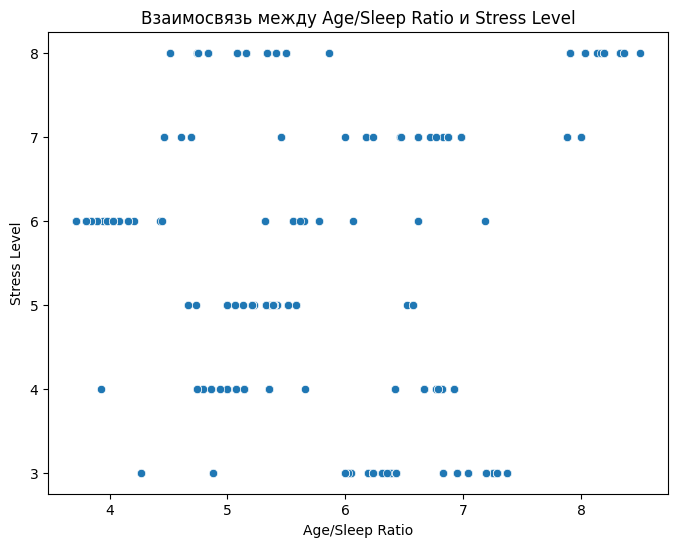

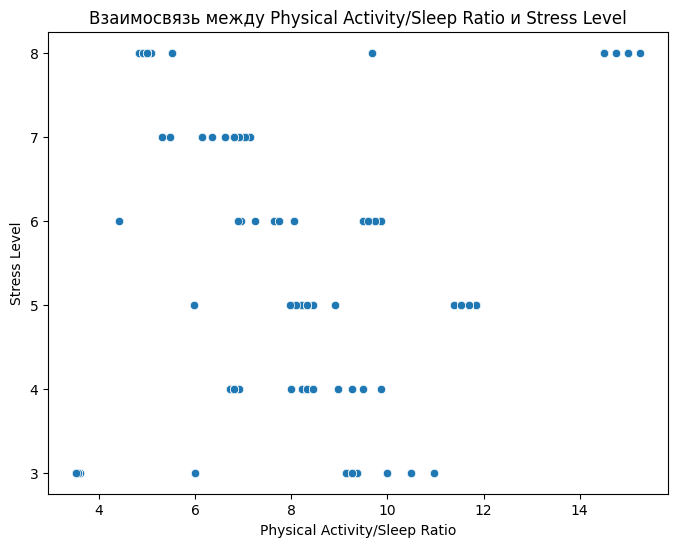

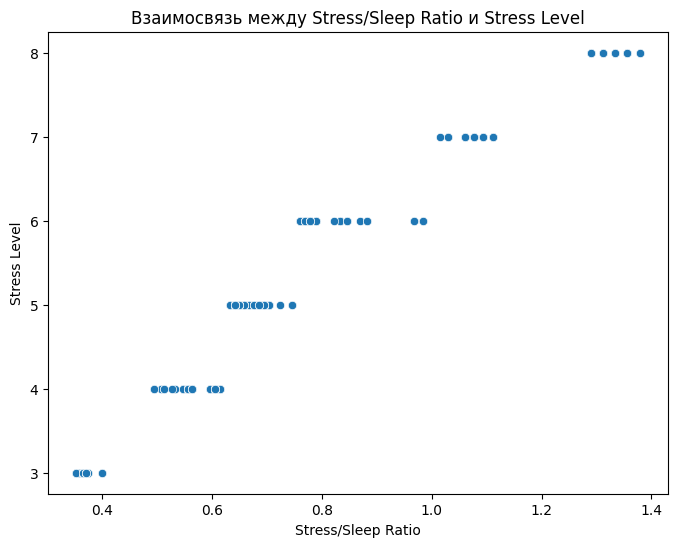

In [24]:
# Визуализация взаимосвязи между 'Age/Sleep Ratio' и 'Stress Level'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age/Sleep Ratio', y='Stress Level', data=poly_df)
plt.title('Взаимосвязь между Age/Sleep Ratio и Stress Level')
plt.xlabel('Age/Sleep Ratio')
plt.ylabel('Stress Level')
plt.show()

# Визуализация взаимосвязи между 'Physical Activity/Sleep Ratio' и 'Stress Level'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Physical Activity/Sleep Ratio', y='Stress Level', data=poly_df)
plt.title('Взаимосвязь между Physical Activity/Sleep Ratio и Stress Level')
plt.xlabel('Physical Activity/Sleep Ratio')
plt.ylabel('Stress Level')
plt.show()

# Визуализация взаимосвязи между 'Stress/Sleep Ratio' и 'Stress Level'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Stress/Sleep Ratio', y='Stress Level', data=poly_df)
plt.title('Взаимосвязь между Stress/Sleep Ratio и Stress Level')
plt.xlabel('Stress/Sleep Ratio')
plt.ylabel('Stress Level')
plt.show()

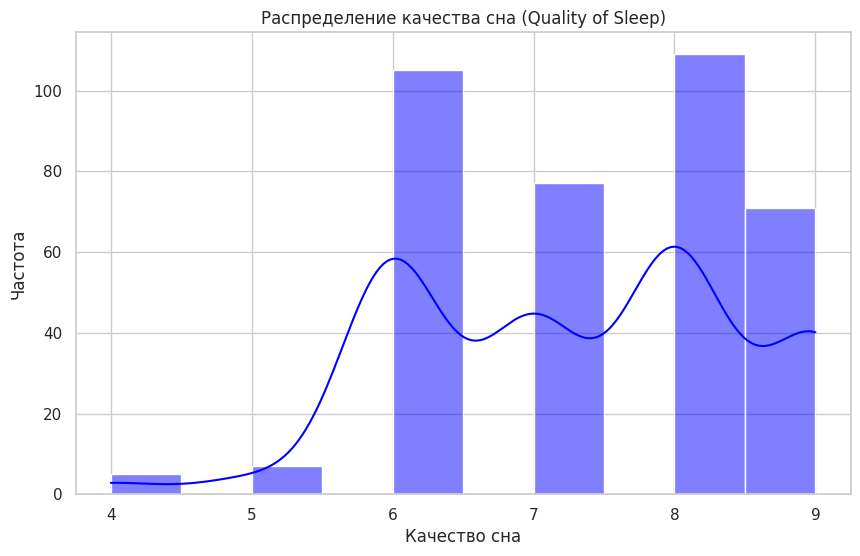

In [25]:
sns.set(style='whitegrid')

# Визуализация распределения
plt.figure(figsize=(10, 6))
sns.histplot(df['Quality of Sleep'], kde=True, color='blue')
plt.title('Распределение качества сна (Quality of Sleep)')
plt.xlabel('Качество сна')
plt.ylabel('Частота')
plt.show()

In [26]:
# Разделение данных
X = df.drop('Quality of Sleep', axis=1)
X = X.select_dtypes(include=['number'])  # Выбираем только числовые признаки

y = df['Quality of Sleep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построим модель регрессии дерева решений (DecisionTreeRegressor) и оценим ее производительность на тестовой выборке
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [27]:
y_pred = model.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred)
print(f"MSE базовой модели: {mse_baseline:.2f}")

MSE базовой модели: 0.01


In [28]:
tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)
prediction = tree.predict(X_test)

print(f'R^2 на тренировочных данных {r2_score(y_train, tree.predict(X_train))}')
print(f'R^2 на тестовых данных {r2_score(y_test, tree.predict(X_test))}')

R^2 на тренировочных данных 1.0
R^2 на тестовых данных 1.0


In [32]:
# Создаем RFE модель и выбираем 5 признаков
rfe = RFE(estimator=tree, n_features_to_select=5)
rfe = rfe.fit(X, y)

# Показываем какие признаки выбраны
selected_features = pd.DataFrame({
    'Feature': X.columns,  # Здесь X.columns должен содержать названия столбцов, использованных для X
    'Ranking': rfe.ranking_
})
print(selected_features.sort_values(by='Ranking', ascending=False))

                                    Feature  Ranking
0                                    Gender       87
1         BMI Category Group_Избыточный вес       86
46                           Stress Level^2       85
45  Physical Activity Level Age/Sleep Ratio       84
47                  Stress Level Heart Rate       83
..                                      ...      ...
25                         Sleep Duration^2        1
60            Heart Rate Stress/Sleep Ratio        1
2         BMI Category Group_Нормальный вес        1
56                   Heart Rate Daily Steps        1
51                         Stress Level MBP        1

[91 rows x 2 columns]


In [33]:
top_features = selected_features.sort_values(by='Ranking', ascending=False)[:6]
X_train_selected = X_train[top_features.Feature]
X_test_selected = X_test[top_features.Feature]

# Обучение дерева решений на отобранных признаках
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_selected, y_train)
print(f'R^2 на тренировочных данных {r2_score(y_train, dt.predict(X_train_selected))}')
print(f'R^2 на тестовых данных {r2_score(y_test, dt.predict(X_test_selected))}')

R^2 на тренировочных данных 1.0
R^2 на тестовых данных 1.0


Ситуация, когда модель показывает R^2 = 1.0 как на тренировочных, так и на тестовых данных, очень подозрительна. Это говорит о том, что модель скорее всего переобучилась

In [35]:
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)

# Отбор 5 наиболее важных признаков
top_features = feature_importances.nlargest(5).index
top_features

Index(['Stress Level MBP', 'Sleep Duration^2', 'Stress/Sleep Ratio^2',
       'BMI Category Group_Избыточный вес', 'Heart Rate Stress/Sleep Ratio'],
      dtype='object')

In [37]:
from sklearn.feature_selection import SelectKBest, chi2  # Import chi2 for scoring function

selector = SelectKBest(score_func=chi2, k=5)  # Use chi2 as the scoring function

# Обучаем селектор на обучающей выборке
selector.fit(X_train, y_train)

# Получаем отобранные признаки
selected_features = X_train.columns[selector.get_support()]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Обучение дерева решений на отобранных признаках
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_selected, y_train)

print(f'R^2 на тренировочных данных (SelectKBest): {r2_score(y_train, dt.predict(X_train_selected))}')
print(f'R^2 на тестовых данных (SelectKBest): {r2_score(y_test, dt.predict(X_test_selected))}')

# Сравнение с моделью без отбора признаков
# Обучение модели без отбора признаков

dt_all = DecisionTreeRegressor(random_state=42)
dt_all.fit(X_train, y_train)

print(f'R^2 на тренировочных данных (все признаки): {r2_score(y_train, dt_all.predict(X_train))}')
print(f'R^2 на тестовых данных (все признаки): {r2_score(y_test, dt_all.predict(X_test))}')

R^2 на тренировочных данных (SelectKBest): 0.9886385158823883
R^2 на тестовых данных (SelectKBest): 0.991101295864697
R^2 на тренировочных данных (все признаки): 1.0
R^2 на тестовых данных (все признаки): 0.9911619137402781


Результаты показывают, что отбор признаков с помощью SelectKBest с функцией оценки chi2 не улучшил, а ухудшил качество модели в данном случае.

Модель со всеми признаками: R^2 = 1.0 идеально предсказывает целевую переменную на обучающей выборке. Это часто бывает признаком переобучения.

Модель с отобранными признаками: R^2 = 0.9886 немного ниже, чем у модели со всеми признаками, что может свидетельствовать о том, что SelectKBest удалил важные для модели признаки.

R^2 на тестовых данных = 0.99116 -показывает высокую точность на тестовых данных.

Модель с отобранными признаками: R^2 = 0.9911, как у модели со всеми признаками. Однако, учитывая, что модель со всеми признаками имела идеальное предсказание на обучении, можно предположить, что SelectKBest удалил признаки, которые помогали модели обобщать информацию и предсказывать новые данные лучше.


In [38]:
! pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.3 MB/s eta 0:00:00


In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV


# Функция для оценки модели с помощью перекрестной проверки
def evaluate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    return scores.mean()

# Поиск гиперпараметров с помощью сетки параметров
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Лучшие гиперпараметры (Grid Search): {grid_search.best_params_}")
print(f"Лучшая оценка (Grid Search): {grid_search.best_score_:.2f}")

Лучшие гиперпараметры (Grid Search): {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая оценка (Grid Search): 0.94


In [41]:
from skopt.space import Real, Categorical, Integer

# Определим модель и область поиска
search_space = {
    "max_depth": Integer(6, 10),
    "max_features": Categorical(['sqrt', 'log2']), # Changed 'auto' to valid options
    "min_samples_leaf": Integer(3, 5),
    "min_samples_split": Integer(4, 6),

}

# Инициализируем BayesSearchCV
clf_bayes = BayesSearchCV(
    estimator=tree,
    search_spaces=search_space,
    random_state=0,
    cv=3,
    verbose=2,
    n_jobs=-1
)
clf_bayes.fit(X, y)

# Получим самые лучшие hyperparameters и R2 score
best_params = clf_bayes.best_params_
best_r2 = clf_bayes.best_score_

print(f"Лучшие гиперпараметры (Bayesian Optimization): {best_params}")
print(f"Лучшая оценка (Bayesian Optimization): {best_r2:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

Для оптимизации гиперпараметров модели машинного обучения использовали методы Grid Search и Bayesian Optimization.

Grid Search: перебор всех возможных комбинаций гиперпараметров.<br>
Лучшие гиперпараметры:

max_depth=7,<br>
min_samples_leaf=1,<br>
min_samples_split=2.<br>
Оценка R^2: 0.94.<br>

Bayesian Optimization: использование байесовского подхода для поиска оптимальных гиперпараметров.<br>

Лучшие гиперпараметры:
max_depth=9,<br>
max_features=‘log2’,<br>
min_samples_leaf=5,<br>
min_samples_split=6.<br>
Оценка R^2: 0.54.<br>

Метод Grid Search показал более высокую эффективность с оценкой R^2, равной 0.94, по сравнению с Bayesian Optimization, у которого оценка R^2 составила 0.54.
Это говорит о том, что настройки гиперпараметров, подобранные методом Grid Search, лучше подходят для моделирования с данными.